In [7]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import csv
import gym
import torch
from algorithms.Actor_Critic_A2C_Algorithm import *


In [8]:
df_dqn = pd.read_csv("dqn.csv")
df_a2c = pd.read_csv("A2C.csv")
df_rf = pd.read_csv("RF.csv")
df_list = [df_dqn, df_rf, df_a2c]
df_list_updated = []


In [9]:
for item in df_list:
    item["mean"] = item.mean(axis=1)
    item["lower_bound"] = item.min(axis=1)
    item["upper_bound"] = item.max(axis=1)



In [10]:
for item in df_list:
    item_mean = []
    item_lower = []
    item_upper = []
    for i in range(len(item["mean"])):
        if i % 100 == 0:
            item_mean.append(item["mean"][i])
            item_lower.append(item["lower_bound"][i])
            item_upper.append(item["upper_bound"][i])

    dict = {'mean': item_mean, 'lower': item_lower, 'upper': item_upper} 

    item = pd.DataFrame(dict)
    df_list_updated.append(item)
    

In [11]:
print(df_list_updated)

[      mean  lower  upper
0      1.0    1.0    1.0
1     12.2    2.0   29.0
2     19.4    1.0   50.0
3      5.2    2.0   12.0
4      7.4    2.0   18.0
..     ...    ...    ...
345   87.4   10.0  181.0
346   60.4    1.0  110.0
347   63.6    6.0  139.0
348  118.6   33.0  239.0
349   81.4   33.0  206.0

[350 rows x 3 columns],      mean  lower  upper
0     1.0    1.0    1.0
1    14.0    5.0   25.0
2    13.8   11.0   17.0
3    10.4    3.0   20.0
4    29.2    3.0   68.0
..    ...    ...    ...
345  36.4   24.0   50.0
346  21.6    2.0   52.0
347  29.6    1.0   63.0
348  32.4   15.0   65.0
349  32.2    3.0   66.0

[350 rows x 3 columns],      mean  lower  upper
0     1.0    1.0    1.0
1     8.2    3.0   15.0
2     3.6    1.0   10.0
3    21.4    3.0   47.0
4    20.6    7.0   45.0
..    ...    ...    ...
345  58.4    1.0  106.0
346  20.8    5.0   35.0
347  82.4   25.0  117.0
348  87.4   10.0  205.0
349  42.6    4.0  111.0

[350 rows x 3 columns]]


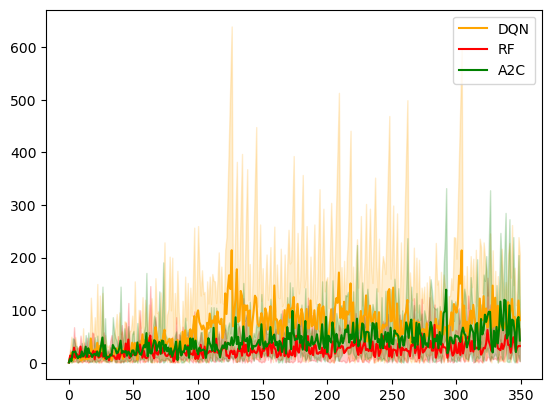

In [12]:
color = ['orange', 'red', 'green']
for i in range(len(df_list_updated)):
    plt.plot(df_list_updated[i].index, df_list_updated[i]["mean"], color=color[i])
    plt.fill_between(df_list_updated[i].index, df_list_updated[i]["lower"], df_list_updated[i]["upper"] , alpha=0.2,  color=color[i], label='_nolegend_')
plt.legend(['DQN', 'RF', 'A2C'])
plt.xlabel(df_dqn.index.name)
plt.show()

In [22]:
def render_testing(env, policy, DQN = None, REINFORCE = None, A2C = None, max_steps=10000):
    """
    This function does not need to be modified
    Renders policy once on environment. Watch your agent play!

    Parameters
    ----------
    env: gym.core.Environment
      Environment to play on. Must have nS, nA, and P as
      attributes.
    Policy: np.array of shape [env.nS]
      The action to take at a given state
    """
    episode_reward_list_testing = []
    env = gym.make("CartPole", render_mode="rgb_array")
    
    for seed in range(10000, 10000+100):
        episode_reward = 0
        ob, _ = env.reset(seed = seed)

        for t in range(max_steps):
            env.render()
            # time.sleep(0.01)
            if DQN is not None:
                a = DQN.act(ob,  0.05)
                name = "dqn_result.csv"
            elif REINFORCE is not None:
                a, _ = REINFORCE.act(ob)
                name = "RF_result.csv"        
            elif A2C is not None:
                a, _, _ = A2C.act(ob)    
                name = "A2C_result.csv"             
            else:
                a = policy[ob]
            ob, rew, done, _, _ = env.step(a)
            episode_reward += rew
            if done:
                break

        env.render()
        if not done:
            # print(
            #     "The agent didn't reach a terminal state in {} steps.".format(
            #         max_steps
            #     )
            # )
            episode_reward_list_testing.append(episode_reward)
        else:
            # print("Testing episode reward: %f" % episode_reward)
            episode_reward_list_testing.append(episode_reward)
    
    mean_reward = np.mean(episode_reward_list_testing)
    std_reward = np.std(episode_reward_list_testing)
    with open(name, 'w') as f:
     
        # using csv.writer method from CSV package
        write = csv.writer(f)
        
        write.writerow(episode_reward_list_testing)
    return mean_reward, std_reward, episode_reward_list_testing

In [25]:
model_DQN_1 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\DQN_model_0.pt") 
model_DQN_2 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\DQN_model_1.pt") 
model_DQN_3 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\DQN_model_2.pt") 
model_DQN_4 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\DQN_model_3.pt") 
model_DQN_5 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\DQN_model_4.pt") 

# sd1 = model_DQN_1.state_dict()
# sd2 = model_DQN_2.state_dict()
# sd3 = model_DQN_2.state_dict()
# sd4 = model_DQN_3.state_dict()
# sd5 = model_DQN_4.state_dict()


# # Average all parameters
# for key in sd1:
#     sd5[key] = (sd1[key] + sd2[key] + sd3[key] + sd4[key] + sd5[key]) / 5.
# # Recreate model and load averaged state_dict (or use modelA/B)
# model_DQN_5.load_state_dict(sd5)

mean_reward_1, std_reward_1, _ = render_testing(None, None, DQN = model_DQN_1)  
mean_reward_2, std_reward_2, _ = render_testing(None, None, DQN = model_DQN_2)  
mean_reward_3, std_reward_3, _ = render_testing(None, None, DQN = model_DQN_3)  
mean_reward_4, std_reward_4, _ = render_testing(None, None, DQN = model_DQN_4)  
mean_reward_5, std_reward_5, _ = render_testing(None, None, DQN = model_DQN_5)

mean_list = [mean_reward_1, mean_reward_2, mean_reward_3, mean_reward_4, mean_reward_5]
std_list = [std_reward_1, std_reward_2, std_reward_3, std_reward_4, std_reward_5]




d:\Hoang\Anaconda3\envs\cs234\lib\site-packages\gym\envs\registration.py:563: UserWarning: WARN: Using the latest versioned environment `CartPole-v1` instead of the unversioned environment `CartPole`.
  logger.warn(
d:\Hoang\Anaconda3\envs\cs234\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [26]:
mean = np.mean(mean_list)
print(mean)
std = np.mean(std_list)
print(std)

159.756
26.247480763347074


In [27]:
model_RF_1 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\RF_model_0.pt") 
model_RF_2 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\RF_model_1.pt") 
model_RF_3 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\RF_model_2.pt") 
model_RF_4 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\RF_model_3.pt") 
model_RF_5 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\RF_model_4.pt") 

# sd1 = model_DQN_1.state_dict()
# sd2 = model_DQN_2.state_dict()
# sd3 = model_DQN_2.state_dict()
# sd4 = model_DQN_3.state_dict()
# sd5 = model_DQN_4.state_dict()


# # Average all parameters
# for key in sd1:
#     sd5[key] = (sd1[key] + sd2[key] + sd3[key] + sd4[key] + sd5[key]) / 5.
# # Recreate model and load averaged state_dict (or use modelA/B)
# model_DQN_5.load_state_dict(sd5)

mean_reward_1, std_reward_1, _ = render_testing(None, None, None, REINFORCE=model_RF_1)  
mean_reward_2, std_reward_2, _ = render_testing(None, None, None, REINFORCE=model_RF_2)  
mean_reward_3, std_reward_3, _ = render_testing(None, None, None, REINFORCE=model_RF_3)  
mean_reward_4, std_reward_4, _ = render_testing(None, None, None, REINFORCE=model_RF_4)  
mean_reward_5, std_reward_5, _ = render_testing(None, None, None, REINFORCE=model_RF_5)  

mean_list = [mean_reward_1, mean_reward_2, mean_reward_3, mean_reward_4, mean_reward_5]
std_list = [std_reward_1, std_reward_2, std_reward_3, std_reward_4, std_reward_5]


In [28]:
mean = np.mean(mean_list)
print(mean)
std = np.mean(std_list)
print(std)

50.03
29.13491679500499


In [29]:
model_A2C_1 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\A2C_model_0.pt") 
model_A2C_2 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\A2C_model_1.pt") 
model_A2C_3 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\A2C_model_2.pt") 
model_A2C_4 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\A2C_model_3.pt") 
model_A2C_5 = torch.load("D:\Hoang\Projects_and_Studies\Deakin Artificial Intelligent\Git_Repos\Reinforcement_Learning_Algorithms_Implementation\A2C_model_4.pt") 

# sd1 = model_DQN_1.state_dict()
# sd2 = model_DQN_2.state_dict()
# sd3 = model_DQN_2.state_dict()
# sd4 = model_DQN_3.state_dict()
# sd5 = model_DQN_4.state_dict()


# # Average all parameters
# for key in sd1:
#     sd5[key] = (sd1[key] + sd2[key] + sd3[key] + sd4[key] + sd5[key]) / 5.
# # Recreate model and load averaged state_dict (or use modelA/B)
# model_DQN_5.load_state_dict(sd5)

mean_reward_1, std_reward_1, _ = render_testing(None, None, None, None, A2C=model_A2C_1)  
mean_reward_2, std_reward_2, _ = render_testing(None, None, None, None, A2C=model_A2C_2)  
mean_reward_3, std_reward_3, _ = render_testing(None, None, None, None, A2C=model_A2C_3)  
mean_reward_4, std_reward_4, _ = render_testing(None, None, None, None, A2C=model_A2C_4)  
mean_reward_5, std_reward_5, _ = render_testing(None, None, None, None, A2C=model_A2C_5)  

mean_list = [mean_reward_1, mean_reward_2, mean_reward_3, mean_reward_4, mean_reward_5]
std_list = [std_reward_1, std_reward_2, std_reward_3, std_reward_4, std_reward_5]


In [30]:
mean = np.mean(mean_list)
print(mean)
std = np.mean(std_list)
print(std)

121.19800000000001
52.95916130003692
